<a href="https://colab.research.google.com/github/yeseulii/python/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import os

fashion_mnist = tf.keras.datasets.fashion_mnist

# 데이터를 불러옵니다.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [ ]:

type(x_train)


numpy.ndarray

In [ ]:

print(x_train.shape)

(60000, 28, 28)


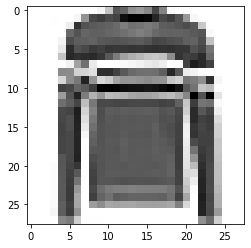

In [ ]:

# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(x_train[5], cmap='Greys')
plt.show()

In [ ]:

# 이미지가 인식되는 원리를 알아봅시다.

import sys

for x in x_train[5]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  1  0  0  0  0  22 88 1881721321251411991439  0  0  0  1  0  0  0  0  0  
0  0  0  1  0  0  20 13119920619620224225525525022219720618812617 0  0  0  0  0  0  
0  0  0  1  0  35 21419118317817516815016215915215817918318919518582 0  0  0  0  0  
0  0  0  0  0  17019017217717617116916215514815416917417517517718318812 0  0  0  0  
0  0  0  0  25 19418017817418418718918718418118920019719319017817519490 0  0  0  0  
0  0  0  0  42 2181911972082042112092102122112142152132142112111912001580  0  0  0  
0  0  0  0  88 22121521721921118515011810799 88 83 90 1352122032072191690  0  0  0  
0  0  0  0  0  27 11816240 0  0  0  10 19 28 39 47 36 0  0  2032302202030  0  0  0  
0  0  0  0  13813671 69 54 21621720318416816316216317822118638 26 7  0  0  0  0  0  
0  0  0  0  67 13415422412966 81 11712912813213713112986 73 15715113421618 0  0  0  
0  0  0  0  20319817218320625525525024324023923523824425523818416086 98 0  0  0  0  
0  0  0  0  12218822415110512797 10010511411711711310398 11114225

In [ ]:

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.

#MODEL_DIR = './data/model/'
#if not os.path.exists(MODEL_DIR):
#    os.mkdir(MODEL_DIR)

modelpath="./data/model/MNIST_CNN.hdf5"


checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(x_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.38114, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.38114 to 0.31647, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.31647 to 0.29048, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.29048 to 0.26639, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.26639 to 0.25092, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.25092 to 0.25003, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.25003 to 0.24125, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.24125 to 0.23955, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 9: val_loss improved from 0.23955 to 0.23631, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 10: val_loss improved from 0.23631 to 0.22113, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 11: val_loss did not impro

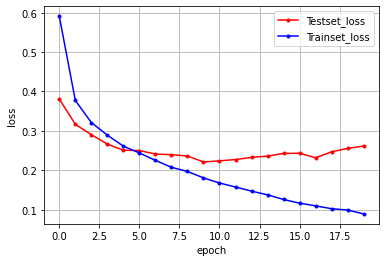

In [ ]:
# 검증셋과 학습셋의 오차를 그래프로 표현
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()